In [1]:
# 必要なライブラリのインポート
from bs4 import BeautifulSoup
import re
import MeCab
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# authors.txtをもとに、wgetして作品IDが入ったpersonID??.txtを生成(??にはpersonIDが入る)
# personID_listにはpersonIDを入れる

personID_list = []
memo = open('./authors.txt')
for line in memo:
    line = line.rstrip()
    line = line.split( )
    #print(line)
    author = line[0]
    personID = line[1]
    personID_list.append(personID)
    
    # authors.txtに書かれているIDをもとに、indexをwgetする（すでに作成済なのでやる必要なし）
    #!wget https://www.aozora.gr.jp/index_pages/person{personID}.html -O ./data/index{personID}.html
    #!sleep 1
    
    # 保存したindexを開く
    with open("./data/index{}.html".format(personID), encoding="utf-8") as f:
        soup = BeautifulSoup(f)
        ol = soup.find("ol").text
        bookID = re.findall('ID：[0-9]*', ol) # index.htmlの中から、作品IDが書いてある部分を取得
        #print(bookID)
        bookID_list = []
        for b in bookID:
            b = b[3:] # 'ID：'の削除
            bookID_list.append(b) # 作品IDの追加
        #print(bookID_list)
        
        print('author {}\tpersonID {}\tnumber of cards {}'.format(author, personID, len(bookID_list)))
        
        # bookID_listをもとに、ある作者の作品IDが記述されているテキストファイルを作成（すでに作成済なのでやる必要なし）
        #with open('./data/personID{}.txt'.format(personID), mode='w') as f:
        #    for b in bookID_list:
        #        f.write(b + ' ')

author 芥川龍之介	personID 879	number of cards 376
author 有島武郎	personID 25	number of cards 44
author アンデルセンハンス・クリスチャン	personID 19	number of cards 23
author 石川啄木	personID 153	number of cards 78
author 石原純	personID 1429	number of cards 24
author 泉鏡花	personID 50	number of cards 208
author 伊丹万作	personID 231	number of cards 23
author 伊藤左千夫	personID 58	number of cards 39
author 伊藤野枝	personID 416	number of cards 80
author 上田敏	personID 235	number of cards 53
author 上村松園	personID 355	number of cards 83
author 内田魯庵	personID 165	number of cards 26
author 海野十三	personID 160	number of cards 177
author 江戸川乱歩	personID 1779	number of cards 91
author 大久保ゆう	personID 10	number of cards 68
author 大隈重信	personID 1879	number of cards 31
author 大町桂月	personID 237	number of cards 60
author 丘浅次郎	personID 1474	number of cards 25
author 岡本かの子	personID 76	number of cards 119
author 岡本綺堂	personID 82	number of cards 247
author 小川未明	personID 1475	number of cards 521
author 小熊秀雄	personID 124	number of cards 33
author 小栗虫太郎	p

In [3]:
# personID??.txtから作品IDを取得して、その作品をwgetで持ってくる（作者1人あたり50作品まで）
# 作品が書かれているhtmlの名前はtest_x_y.html(xがpersonID、yがbookID)

for personID in personID_list:
    print('personID', personID)
    with open("./data/personID{}.txt".format(personID), encoding="utf-8") as f:
        for bookID_str in f:
            bookID_list = bookID_str.split( )
            print('number of cards', len(bookID_list))
            
            # 作品数が多すぎると時間かかるので50作品までに限定
            if len(bookID_list) >= 50:
                bookID_list = bookID_list[:50]
            for bookID in bookID_list:
                print('ID', bookID)
                
                # bookIDをもとにwgetして本文が記述されているhtmlを作成（すでに作成済なのでやる必要なし）
                #!wget http://pubserver2.herokuapp.com/api/v0.1/books/{bookID}/content?format=html -O ./data/text{personID}_{bookID}.html
                #!sleep 1

personID 879
number of cards 376
ID 4872
ID 16
ID 178
ID 43014
ID 15
ID 3804
ID 21
ID 43361
ID 17
ID 14
ID 1138
ID 19
ID 73
ID 20
ID 3827
ID 122
ID 129
ID 18
ID 3767
ID 43362
ID 16034
ID 3750
ID 3748
ID 57
ID 3761
ID 58
ID 43363
ID 56
ID 55
ID 4274
ID 177
ID 4312
ID 51864
ID 174
ID 175
ID 3823
ID 176
ID 3751
ID 35
ID 43364
ID 3825
ID 118
ID 117
ID 3763
ID 123
ID 49328
ID 3824
ID 115
ID 116
ID 119
personID 25
number of cards 44
ID 201
ID 202
ID 4490
ID 1111
ID 1145
ID 1147
ID 49995
ID 1144
ID 49934
ID 215
ID 1143
ID 204
ID 212
ID 4694
ID 50213
ID 2943
ID 1146
ID 4666
ID 1053
ID 213
ID 49936
ID 49856
ID 216
ID 1148
ID 217
ID 218
ID 206
ID 4994
ID 47220
ID 1149
ID 49937
ID 42152
ID 209
ID 211
ID 210
ID 207
ID 56503
ID 208
ID 203
ID 50502
ID 50010
ID 4993
ID 214
ID 205
personID 19
number of cards 22
ID 42378
ID 58165
ID 46318
ID 42380
ID 42381
ID 42379
ID 4376
ID 42382
ID 59322
ID 58849
ID 42383
ID 58848
ID 59325
ID 42384
ID 46319
ID 42385
ID 194
ID 42386
ID 58875
ID 44423
ID 58882
ID 4238

ID 4414
ID 46351
ID 46499
ID 4106
ID 46300
ID 46170
ID 46301
ID 46171
ID 46299
ID 507
ID 46302
ID 47832
ID 452
ID 47833
ID 53487
ID 1325
ID 46168
ID 47835
ID 46352
ID 47836
ID 46303
ID 46304
ID 732
ID 737
ID 53805
ID 47287
ID 46354
ID 46353
ID 47843
ID 46305
ID 862
ID 47834
ID 47052
ID 47838
ID 46355
ID 46356
ID 337
ID 46358
ID 53449
ID 47830
ID 46357
ID 47839
ID 380
ID 53806
ID 46359
personID 933
number of cards 197
ID 18403
ID 47178
ID 58168
ID 47786
ID 46324
ID 46382
ID 50194
ID 42295
ID 46312
ID 18406
ID 47683
ID 47684
ID 18405
ID 46945
ID 5010
ID 46944
ID 13214
ID 5011
ID 46949
ID 47792
ID 18404
ID 47687
ID 47685
ID 47686
ID 42296
ID 47688
ID 47179
ID 47789
ID 18395
ID 5013
ID 47790
ID 47791
ID 47689
ID 47690
ID 47794
ID 24433
ID 46325
ID 33201
ID 18396
ID 47691
ID 46326
ID 47692
ID 47693
ID 47694
ID 46313
ID 47180
ID 47182
ID 12618
ID 47183
ID 47184


In [4]:
# doc(作品の本文)を動詞・形容詞・名詞のみのwordsというリストにする
# wordsとtagからなるTaggedDocumentを生成

def split_into_words(doc, name=''):
    mecab = MeCab.Tagger("-Ochasen")
    lines = mecab.parse(doc).splitlines() # 形態素解析
    words = []
    for line in lines:
        chunks = line.split('\t')
        # 名詞（数詞は除く）、動詞、形容詞のみ加える
        if len(chunks) > 3 and (chunks[3].startswith('動詞') or chunks[3].startswith('形容詞') or (chunks[3].startswith('名詞') and not chunks[3].startswith('名詞-数'))):
            words.append(chunks[0])
    #print(words)
    return TaggedDocument(words=words, tags=[name])

In [5]:
# 学習させるtrain_textを生成（著者1人あたり20作品で固定）
# テスト用のtest_textも作る（学習で使わないデータの残り全てを使用）
# 人によって作品数が違うので、test_textに含まれる作品数も人によって異なる

train_text = []
test_text = []

for i, personID in enumerate(personID_list):
    print('personID', personID)

    with open("./data/personID{}.txt".format(personID), encoding="utf-8") as f:
        for bookID_str in f:
            #print(bookID)
            bookID_list = bookID_str.split( )
            
            # 50作品以上はダウンロードしてないのでカット
            if len(bookID_list) >= 50:
                bookID_list = bookID_list[:50]
            print('number of cards', len(bookID_list))
            
            for j, bookID in enumerate(bookID_list):
                
                # 先ほど保存した本文が含まれるhtmlを開く
                soup = BeautifulSoup(open("./data/text{}_{}.html".format(personID, bookID), encoding="shift_jis"))

                # 本文が書かれている<div>を取り出す
                main_text = soup.find("div", "main_text").text
                #print(main_text)
                
                # 最初の20作品はtrain_textに入れ、残りはtest_textに入れる
                if j < 20:
                    train_text.append(split_into_words(main_text, str(i)))
                    print('bookID\t{}\ttrain'.format(bookID))
                else:
                    test_text.append(split_into_words(main_text, str(i)))
                    print('bookID\t{}\ttest'.format(bookID))

personID 879
number of cards 50
bookID	4872	train
bookID	16	train
bookID	178	train
bookID	43014	train
bookID	15	train
bookID	3804	train
bookID	21	train
bookID	43361	train
bookID	17	train
bookID	14	train
bookID	1138	train
bookID	19	train
bookID	73	train
bookID	20	train
bookID	3827	train
bookID	122	train
bookID	129	train
bookID	18	train
bookID	3767	train
bookID	43362	train
bookID	16034	test
bookID	3750	test
bookID	3748	test
bookID	57	test
bookID	3761	test
bookID	58	test
bookID	43363	test
bookID	56	test
bookID	55	test
bookID	4274	test
bookID	177	test
bookID	4312	test
bookID	51864	test
bookID	174	test
bookID	175	test
bookID	3823	test
bookID	176	test
bookID	3751	test
bookID	35	test
bookID	43364	test
bookID	3825	test
bookID	118	test
bookID	117	test
bookID	3763	test
bookID	123	test
bookID	49328	test
bookID	3824	test
bookID	115	test
bookID	116	test
bookID	119	test
personID 25
number of cards 44
bookID	201	train
bookID	202	train
bookID	4490	train
bookID	1111	train
bookID	1145	train
bookID	1147	

bookID	47297	test
personID 165
number of cards 26
bookID	49565	train
bookID	3622	train
bookID	891	train
bookID	49566	train
bookID	1211	train
bookID	2392	train
bookID	2402	train
bookID	2394	train
bookID	49567	train
bookID	49568	train
bookID	49569	train
bookID	49570	train
bookID	46497	train
bookID	2395	train
bookID	1210	train
bookID	47122	train
bookID	49571	train
bookID	3223	train
bookID	49572	train
bookID	49573	train
bookID	49574	test
bookID	49440	test
bookID	2393	test
bookID	49575	test
bookID	49576	test
bookID	49577	test
personID 160
number of cards 50
bookID	43667	train
bookID	866	train
bookID	45621	train
bookID	2714	train
bookID	3238	train
bookID	871	train
bookID	3527	train
bookID	880	train
bookID	3367	train
bookID	3355	train
bookID	3354	train
bookID	43761	train
bookID	3356	train
bookID	58611	train
bookID	1237	train
bookID	2686	train
bookID	2638	train
bookID	1224	train
bookID	1256	train
bookID	2659	train
bookID	3370	test
bookID	43663	test
bookID	43718	test
bookID	43627	test
bookID	12

bookID	656	train
bookID	1315	train
bookID	655	train
bookID	2417	train
bookID	2421	train
bookID	42196	train
bookID	56919	train
bookID	46195	train
bookID	56915	train
bookID	56916	train
bookID	56920	train
bookID	56917	train
bookID	46193	train
bookID	46233	train
bookID	46230	train
bookID	56921	train
bookID	56918	train
bookID	46232	train
bookID	46231	test
personID 125
number of cards 22
bookID	43677	train
bookID	45231	train
bookID	43653	train
bookID	1317	train
bookID	49262	train
bookID	4841	train
bookID	43608	train
bookID	667	train
bookID	43678	train
bookID	666	train
bookID	1320	train
bookID	665	train
bookID	1067	train
bookID	1321	train
bookID	4317	train
bookID	1318	train
bookID	43418	train
bookID	43656	train
bookID	46636	train
bookID	43679	train
bookID	43620	test
bookID	45230	test
personID 40
number of cards 50
bookID	1041	train
bookID	47505	train
bookID	42688	train
bookID	42689	train
bookID	53804	train
bookID	4414	train
bookID	46351	train
bookID	46499	train
bookID	4106	train
bookID	46300	

In [6]:
print(len(train_text), len(test_text))

500 523


In [7]:
# Doc2Vecのモデルを作成し、学習させる
model = Doc2Vec(vector_size=len(train_text), dm=0, alpha=0.05, min_count=5)
model.build_vocab(train_text)
model.train(train_text, total_examples=len(train_text), epochs=5)

# 学習結果を保存
#model.save('./data/doc2vec.model')

In [8]:
# 作成したmodelとTaggedDocumentのリストであるtextから、ニューラルネット用のデータを作る
def text2xy(model, text):
    x = []
    y = []
    for i in range(len(text)):
        #print(i)
        vec = model.infer_vector(text[i].words) # 数値からなるベクトルに変換
        x.append(vec.tolist())
        y.append(int(text[i].tags[0]))

    x = np.array(x)
    y = np_utils.to_categorical(y) # tagの数字はonehotに変換
    return x, y

In [9]:
# 学習用データと評価用データの作成
x_train, y_train = text2xy(model, train_text)
x_test, y_test = text2xy(model, test_text)

In [10]:
def dense_train(epochs):
    
    # モデルの定義
    kmodel = models.Sequential()
    kmodel.add(layers.Dense(512, activation='relu', input_shape=(500,)))
    kmodel.add(layers.Dense(256, activation='relu'))
    kmodel.add(layers.Dense(25, activation='softmax'))
    kmodel.summary()

    # モデルのコンパイル
    kmodel.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    
    # モデルの学習
    history = kmodel.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_test, y_test))

    # モデルの保存
    #model.save('./data/dense.h5')
    return history, kmodel

# 正解率のプロット
def draw_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    fig = plt.figure()
    fig1 = fig.add_subplot(111)
    fig1.plot(epochs, acc, 'bo', label='Training acc')
    fig1.plot(epochs, val_acc, 'b', label='Validation acc')

    fig1.set_xlabel('epochs')
    fig1.set_ylabel('accuracy')
    fig.legend(bbox_to_anchor=(0., 0.19, 0.86, 0.102), loc=5) # anchor（凡例）の第２引数がy、第３引数がx

    # 画像の保存
    #fig.savefig('./acc.pdf')
    plt.show()

# lossのプロット
def draw_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    fig = plt.figure()
    fig1 = fig.add_subplot(111)
    fig1.plot(epochs, loss, 'bo', label='Training loss')
    fig1.plot(epochs, val_loss, 'b', label='Validation loss')

    fig1.set_xlabel('epochs')
    fig1.set_ylabel('loss')
    fig.legend(bbox_to_anchor=(0., 0.73, 0.86, 0.102), loc=5) # anchor（凡例）の第２引数がy、第３引数がx

    # 画像の保存
    #fig.savefig('./loss.pdf')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               256512    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 25)                6425      
Total params: 394,265
Trainable params: 394,265
Non-trainable params: 0
_________________________________________________________________

Train on 500 samples, validate on 523 samples
Epoch 1/10
500/500 [==============================] - 0s 424us/step - loss: 3.0035 - acc: 0.3160 - val_loss: 2.9914 - val_acc: 0.4073
Epoch 2/10
500/500 [==============================] - 0s 233us/step - loss: 2.6210 - acc: 0.7620 - val_loss: 2.8130 - val_acc: 0.6233
Epoch 3/10
500/500 [==============================] - 0s 229us/

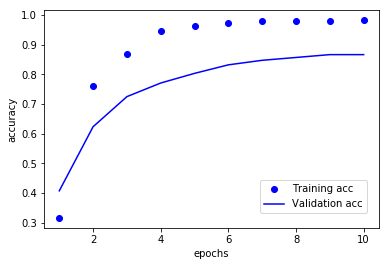

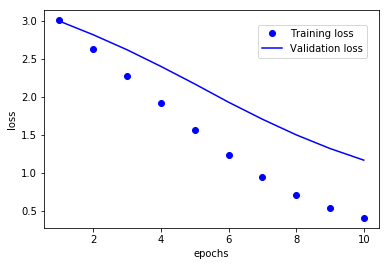

In [11]:
history, kmodel = dense_train(10)
draw_acc(history)
draw_loss(history)

### 以下ではデータがどうなっているかの具体例の紹介

In [12]:
# 本文が含まれるhtmlの中身
with open("./data/text879_16034.html", encoding="shift-jis") as f:
    print(BeautifulSoup(f))

<?xml version="1.0" encoding="Shift_JIS"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns#">
<meta content="summary" name="twitter:card"/>
<meta content="book" property="og:type"/>
<meta content="http://www.aozora.gr.jp/images/top_logo.png" property="og:image"/>
<meta content="image/png" property="og:image:type"/>
<meta content="100" property="og:image:width"/>
<meta content="100" property="og:image:height"/>
<meta content="..." property="og:description"/>
<meta content="遺書(芥川竜之介)" http-equiv="Content-Type" property="og:title"/>
<meta content="text/css" http-equiv="content-style-type"/>
<link href="http://www.aozora.gr.jp/cards/default.css" rel="stylesheet" type="text/css"/>
<title>芥川龍之介 遺書</title>
<link href="http://purl.org/dc/elements/1.1/" rel="DC.Schema"/>
<meta content="芥川龍之介" name="DC.Creator"/>
<meta content="青空文庫" name="DC.Publisher"/>


In [13]:
# 入力データの本文(words)と正解(tags)
test_text[0]

TaggedDocument(words=['僕', '等', '人間', '事件', '為', '容易', '自殺', 'する', 'もの', '僕', '過去', '生活', '決算', '為', '自殺', 'する', 'の', '中', '事件', 'つたの', '僕', '歳', '時', '秀', '夫人', '罪', '犯し', 'こと', '僕', '罪', '犯し', 'こと', '良心', '呵責', '感じ', 'ゐ', '唯', '相手', '選ば', '為', '秀', '夫人', '利己', '主義', '動物', '的', '本能', '甚', 'し', 'い', 'もの', '僕', '生存', '不利', '生じ', 'こと', '少から', '後悔', 'し', 'ゐる', 'なほ', '僕', '恋愛', '関係', '落ち', '女性', '秀', '夫人', '僕', '歳', '以後', '新た', '情人', 'つく', 'こと', 'これ', '道徳', '的', 'つくら', 'の', '唯', '情人', 'つくる', 'こと', '利害', '打算', 'し', '為', '恋愛', '感じ', '訣', '僕', '時', '越し', '人', '相聞', '等', '抒情詩', '作り', '深入り', 'し', '前', '脱却', 'し', '僕', '死に', '生き', 'ゐる', 'の', '苦痛', '他人', '父母', '妻子', 'ある', 'の', '自殺', 'する', '阿呆', '笑', 'ふか', '知れ', '僕', '人', '自殺', 'し', 'あら', '僕', '養家', '人となり', '我儘', '我儘', '言', 'こと', '云', 'ふ', '言', 'ひ', '得', 'の', '僕', '養父母', '孝行', '似', 'もの', '後悔', 'し', 'ゐる', 'これ', '僕', 'つて', 'する', 'こと', '出来', 'の', '僕', '自殺', 'する', 'の', '一生', '度', '我儘', '知れ', '僕', '青年', 'やう', '夢', '見', 'こと', 'あつ', 'つて', '見る', '気', '違', 

In [14]:
# wordsから作られた数値ベクトル
model.infer_vector(test_text[0].words)

array([ 2.19888881e-01,  2.85938084e-02, -9.00700837e-02, -6.46229267e-01,
        1.73839509e-01,  1.19713977e-01, -8.40443298e-02,  3.45848985e-02,
       -2.08633572e-01, -3.50242972e-01, -4.47066575e-01, -8.78954530e-02,
        1.82431102e-01,  1.94975927e-01, -1.30664200e-01, -3.88570763e-02,
       -2.27375463e-01,  3.04856330e-01, -3.23174596e-02,  3.16836536e-01,
       -1.64134204e-02, -1.30881891e-01, -4.31230038e-01, -1.57430917e-01,
       -1.89848810e-01, -3.13095301e-02,  1.34164408e-01,  1.48496658e-01,
       -2.95452066e-02,  1.74285173e-01, -3.66178527e-02,  2.41895728e-02,
       -6.06485941e-02,  2.38207534e-01,  1.13553386e-02,  7.49461576e-02,
        1.44296676e-01, -1.24026254e-01, -3.83557938e-02,  9.48439762e-02,
        1.15291655e-01,  2.87383705e-01,  2.07653902e-02, -1.18493378e-01,
       -1.07049242e-01,  8.95623416e-02,  5.35439048e-03,  1.95011925e-02,
        1.92896053e-01, -2.55719453e-01,  1.70606568e-01,  1.15825124e-01,
        2.13441819e-01,  

In [15]:
# ニューラルネットが返す数値ベクトル（i番目の数値は、tagがiである人の文章であるとニューラルネットが出力した値）
kmodel.predict(model.infer_vector(test_text[0].words).reshape(1, 500))

array([[0.33961975, 0.02273654, 0.00863983, 0.05974703, 0.02834313,
        0.02362921, 0.01367236, 0.02355693, 0.0657605 , 0.04667749,
        0.01964704, 0.03323534, 0.01795152, 0.01077318, 0.02148831,
        0.02130177, 0.03184533, 0.02269149, 0.04242902, 0.02098161,
        0.00807908, 0.02450945, 0.03848065, 0.01380192, 0.04040153]])

In [16]:
# 一番数値が高いインデックスを返す　これがtest_text[0].tagsの数値と一致していれば正解
np.argmax(kmodel.predict(model.infer_vector(test_text[0].words).reshape(1, 500)))

0

In [10]:
test_text[0].tags

['0']